In [38]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

In [39]:
import pandas as pd

In [40]:
# Load the audio file using Librosa
file_path = "CreditCardScamVoicemail.wav"
y, sr = librosa.load(file_path)

In [41]:
# Extract the Pitch using Librosa
f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=50, fmax=300, sr=sr)

In [42]:
# Extract the MFCC using Librosa
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

In [43]:
# Calculate the mean, variance, and skewness of the MFCC using Numpy
mfcc_mean = np.mean(mfcc, axis=1)
mfcc_var = np.var(mfcc, axis=1)
mfcc_skew = skew(mfcc, axis=1)

In [44]:
# Extract the Spectral Centroid using Librosa
centroids = librosa.feature.spectral_centroid(y=y, sr=sr)
centroid_mean = np.mean(centroids)

In [45]:
# Extract the Spectral Rolloff using Librosa
rolloffs = librosa.feature.spectral_rolloff(y=y, sr=sr)
rolloff_mean = np.mean(rolloffs)

In [46]:
# Extract the Spectral Flatness using Librosa
flatness = librosa.feature.spectral_flatness(y=y)
flatness_mean = np.mean(flatness)

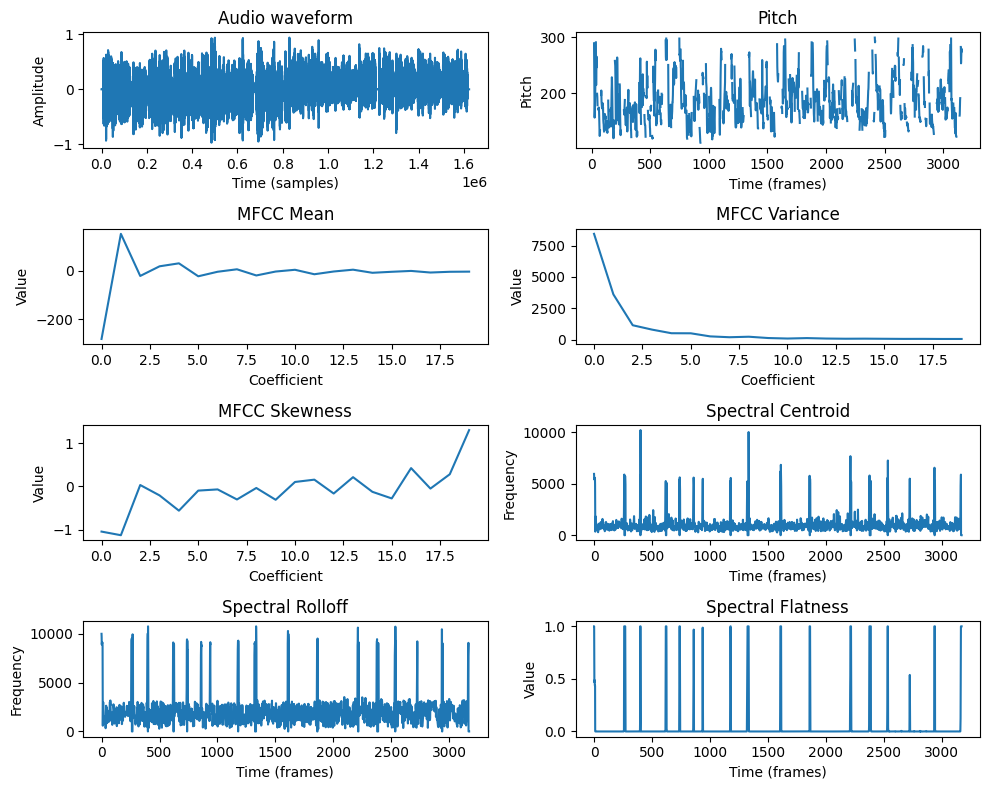

In [47]:
# Plot the audio waveform and the extracted features using Matplotlib
plt.figure(figsize=(10, 8))
plt.subplot(4, 2, 1)
plt.plot(y)
plt.title("Audio waveform")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")

plt.subplot(4, 2, 2)
plt.plot(f0)
plt.title("Pitch")
plt.xlabel("Time (frames)")
plt.ylabel("Pitch")

plt.subplot(4, 2, 3)
plt.plot(mfcc_mean)
plt.title("MFCC Mean")
plt.xlabel("Coefficient")
plt.ylabel("Value")

plt.subplot(4, 2, 4)
plt.plot(mfcc_var)
plt.title("MFCC Variance")
plt.xlabel("Coefficient")
plt.ylabel("Value")

plt.subplot(4, 2, 5)
plt.plot(mfcc_skew)
plt.title("MFCC Skewness")
plt.xlabel("Coefficient")
plt.ylabel("Value")

plt.subplot(4, 2, 6)
plt.plot(centroids.T)
plt.title("Spectral Centroid")
plt.xlabel("Time (frames)")
plt.ylabel("Frequency")

plt.subplot(4, 2, 7)
plt.plot(rolloffs.T)
plt.title("Spectral Rolloff")
plt.xlabel("Time (frames)")
plt.ylabel("Frequency")

plt.subplot(4, 2, 8)
plt.plot(flatness.T)
plt.title("Spectral Flatness")
plt.xlabel("Time (frames)")
plt.ylabel("Value")

plt.tight_layout()
plt.show()

In [48]:
# Print the extracted values
print("Pitch: ", f0)
print("MFCC Mean: ", mfcc_mean.mean())
print("MFCC Variance: ", mfcc_var.mean())
print("MFCC Skewness: ", mfcc_skew.mean())
print("Spectral Centroid: ", centroid_mean)
print("Spectral Rolloff: ", rolloff_mean)
print("Spectral Flatness: ", flatness_mean)

Pitch:  [nan nan nan ... nan nan nan]
MFCC Mean:  -8.260552
MFCC Variance:  822.0625
MFCC Skewness:  -0.09247886
Spectral Centroid:  1030.9073937146838
Spectral Rolloff:  2101.500737272351
Spectral Flatness:  0.0366879


In [49]:
# Store the extracted features into a CSV file
data = {
    # 'Pitch': f0,
    'MFCC Mean': mfcc_mean,
    'MFCC Variance': mfcc_var,
    'MFCC Skewness': mfcc_skew,
    'Spectral Centroid': centroid_mean,
    'Spectral Rolloff': rolloff_mean,
    'Spectral Flatness': flatness_mean
}

df = pd.DataFrame(data)
df.to_csv('call_features.csv', index=False)
